**Description**: Analyze accuracies for $m = 100, n = 50$ where GPT-2 was pretrained for
2 epochs instead of 1.

**Estimated runtime**: 1 hour 

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join("..", "..")))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_gpt2_epochs_2")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

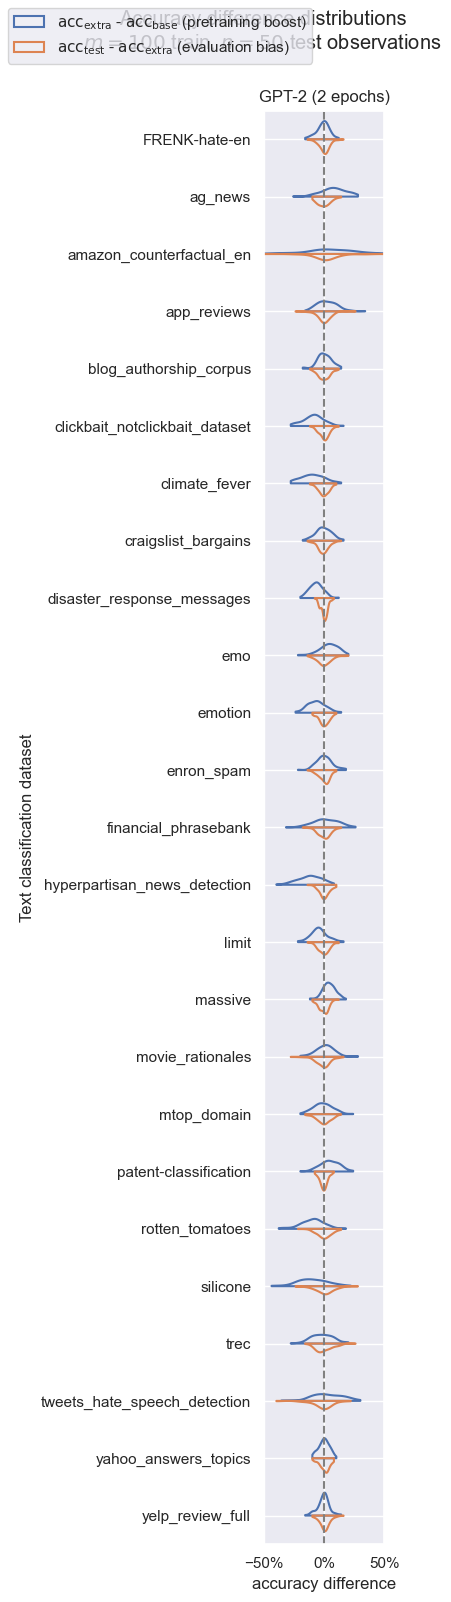

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Pretraining boost

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ -0.0156 ┆ 0.010912 │
└─────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ inf  ┆ NaN │
└──────┴─────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",-0.0114,0.005529
"""ag_news""",0.0798,0.010271
"""amazon_counter…",0.0506,0.021734
"""app_reviews""",0.024,0.008447
"""blog_authorshi…",0.0024,0.006066
…,…,…
"""silicone""",-0.095,0.012525
"""trec""",-0.015,0.00923
"""tweets_hate_sp…",0.0276,0.012507
"""yahoo_answers_…",-0.0024,0.004461


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",-0.016812,0.011451
"""ag_news""",0.199735,0.024854
"""amazon_counter…",0.163068,0.060315
"""app_reviews""",0.391046,0.133691
"""blog_authorshi…",0.01115,0.011775
…,…,…
"""silicone""",-0.15669,0.028438
"""trec""",0.019635,0.038991
"""tweets_hate_sp…",0.069471,0.022194
"""yahoo_answers_…",0.129952,0.071393


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 777 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.00030,0.17235,-0.27715,0.26811,0.00391,0.00279,1943.14869,2095.09392,1.00283
1|dataset:method[FRENK-hate-en:extra],0.02826,0.17223,-0.24584,0.29799,0.00392,0.00277,1935.90764,2433.04981,1.00097
1|dataset:method[ag_news:base],-0.18445,0.17075,-0.43926,0.09765,0.00355,0.00251,2311.99402,2630.76220,1.00167
1|dataset:method[ag_news:extra],0.19570,0.17064,-0.08226,0.45222,0.00358,0.00253,2265.69342,2778.76717,1.00159
1|dataset:method[amazon_counterfactual_en:base],-0.12476,0.16642,-0.37574,0.15430,0.00380,0.00269,1911.12627,2609.92795,1.00182
1|dataset:method[amazon_counterfactual_en:extra],0.17175,0.16865,-0.10489,0.42687,0.00391,0.00276,1855.44969,2686.29105,1.00273
1|dataset:method[app_reviews:base],-0.13162,0.17085,-0.39963,0.13185,0.00381,0.00269,2016.40333,2430.51191,1.00104
1|dataset:method[app_reviews:extra],0.09425,0.17023,-0.16620,0.37276,0.00373,0.00264,2087.22714,2496.81091,1.00118
1|dataset:method[blog_authorship_corpus:base],-0.02616,0.16938,-0.30030,0.24033,0.00383,0.00271,1959.24323,2240.40573,1.00104
1|dataset:method[blog_authorship_corpus:extra],0.05341,0.17137,-0.21463,0.33106,0.00400,0.00283,1839.53790,2290.30324,1.00225


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


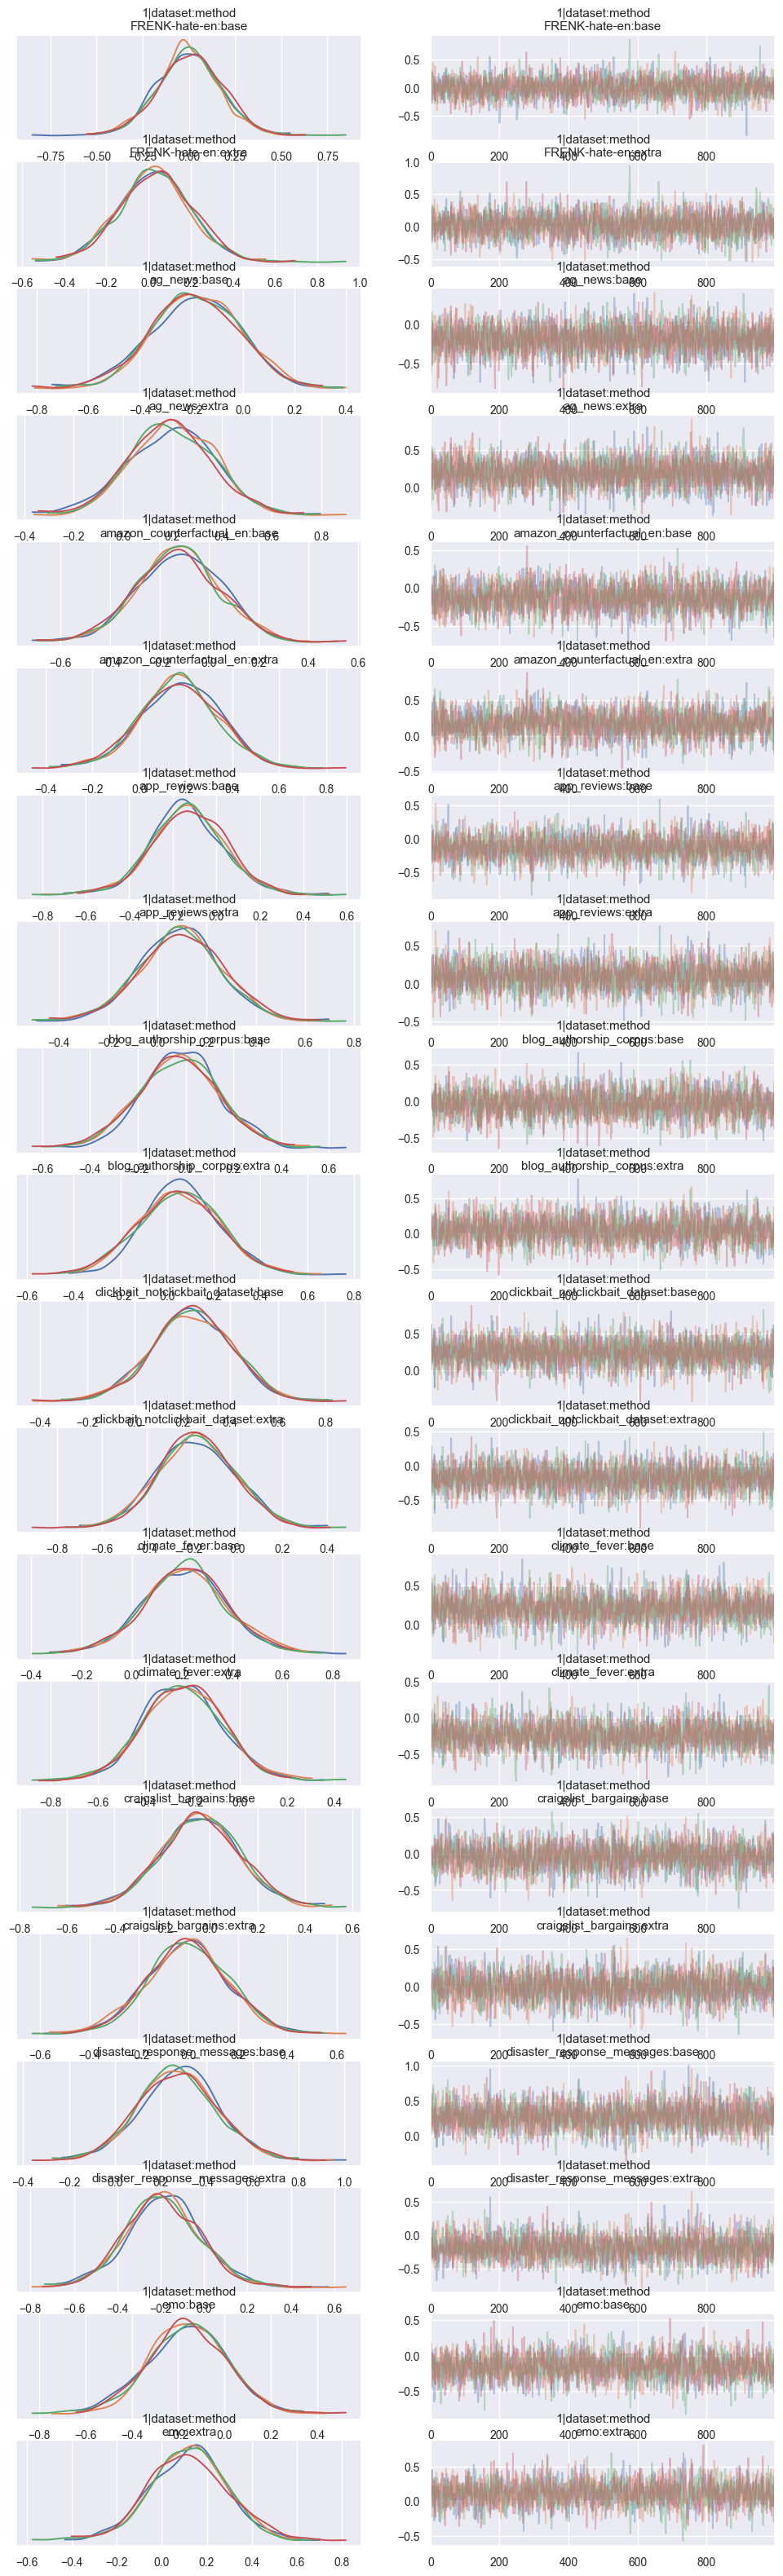

In [10]:
model_boost, summary_boost, az_summary_boost = utils.fit_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001488 ┆ 0.001139 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.026181 ┆ 0.008517 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.0016,0.004694
"""ag_news""",-0.0032,0.005376
"""amazon_counter…",0.014,0.013563
"""app_reviews""",-0.0012,0.00633
"""blog_authorshi…",-0.002,0.004828
…,…,…
"""silicone""",0.0016,0.008508
"""trec""",-0.0012,0.006985
"""tweets_hate_sp…",-0.0156,0.009422
"""yahoo_answers_…",0.0042,0.00421


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.007857,0.009959
"""ag_news""",0.000422,0.010536
"""amazon_counter…",0.059124,0.032546
"""app_reviews""",0.047033,0.039263
"""blog_authorshi…",0.000319,0.009551
…,…,…
"""silicone""",0.028823,0.026611
"""trec""",0.019252,0.029705
"""tweets_hate_sp…",-0.012653,0.016302
"""yahoo_answers_…",0.153807,0.058883


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 728 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00051,0.00903,-0.01457,0.01282,0.00013,0.00012,5964.01808,3590.08336,1.00017
1|dataset:method[FRENK-hate-en:test],0.00048,0.00904,-0.01349,0.01381,0.00013,0.00013,5937.28718,3524.74629,1.00115
1|dataset:method[ag_news:extra],0.00007,0.00924,-0.01211,0.01476,0.00013,0.00012,6347.03189,3481.09889,1.00006
1|dataset:method[ag_news:test],-0.00018,0.00900,-0.01335,0.01419,0.00014,0.00012,4710.16608,2991.71945,1.00155
1|dataset:method[amazon_counterfactual_en:extra],-0.00278,0.00981,-0.01639,0.01266,0.00015,0.00013,4891.94441,2857.76960,1.00013
1|dataset:method[amazon_counterfactual_en:test],0.00286,0.00956,-0.01005,0.01809,0.00014,0.00012,5168.07363,3637.44103,1.00013
1|dataset:method[app_reviews:extra],-0.00000,0.00915,-0.01521,0.01217,0.00014,0.00013,5162.05162,2905.09624,1.00050
1|dataset:method[app_reviews:test],-0.00014,0.00929,-0.01380,0.01464,0.00014,0.00012,4921.89298,3335.15255,0.99999
1|dataset:method[blog_authorship_corpus:extra],-0.00008,0.00901,-0.01515,0.01253,0.00013,0.00012,4957.76578,3511.05234,1.00079
1|dataset:method[blog_authorship_corpus:test],-0.00020,0.00876,-0.01365,0.01327,0.00013,0.00012,5458.76408,3025.91105,1.00149


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


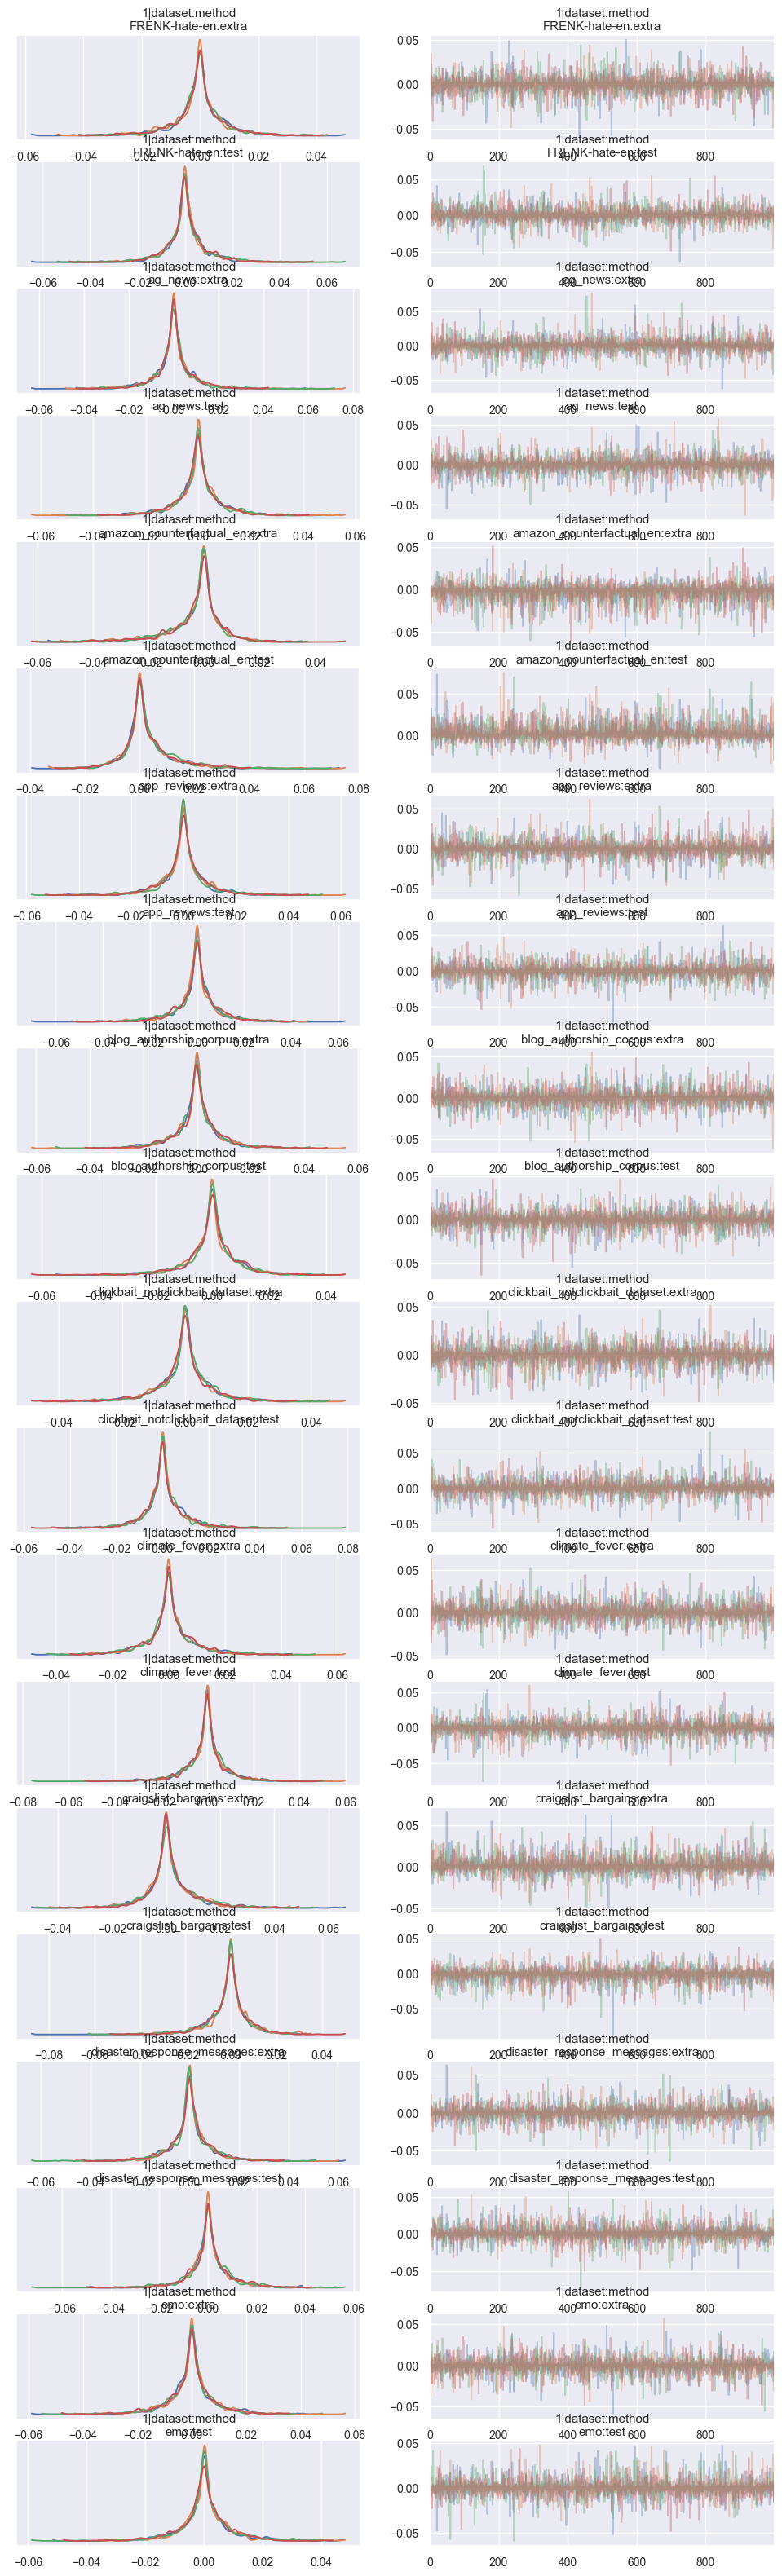

In [15]:
model_bias, summary_bias, az_summary_bias = utils.fit_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", "gpt2-epochs-2", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/gpt2-epochs-2/m100/main_m100_n50_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/gpt2-epochs-2/m100/main_m100_n50_bias.nc'